In [31]:
import pandas as pd
import matplotlib.pyplot as plt

In [32]:
auxilios = pd.read_csv('dados/dados_limpos.csv')
auxilios.head()

,Unnamed: 0,Tipos de auxilio,CID,Despacho,Data nasc,Sexo,Clientela,Vínculo dependentes,Forma Filiação,UF,Quant salarios minimos na RMI,Ramo Atividade,Pensão Alimenticia,Grau Instrução,Qt Anos Contribuição,Duração,Data DIB,Data DDB,Data DCB
0,0,Auxílio Doenca Previdenciário,D25.1 Leiomioma Intramural do Utero,Concessao com Analise Documental,1984-07-04,Feminino,Urbano,Não Informado,Empregado,Alagoas,1.50,Comerciario,Sem Pensâo Alimentícia,Não Informado,9,14 days 00:00:00,2025-10-11,2025-11-01,2025-10-25 00:00:00.000000
1,1,Auxílio Doenca por Acidente do Trabalho,F33.1 Transt Depress Recorr Episodio Atual Mo,Concessao com Analise Documental,1990-09-01,Feminino,Urbano,Não Informado,Empregado,Alagoas,2.06,Comerciario,Sem Pensâo Alimentícia,Não Informado,11,59 days 00:00:00,2025-10-31,2025-11-01,2025-12-29 00:00:00.000000
2,2,Auxílio Doenca Previdenciário,M23 Transt Internos dos Joelhos,Concessao com Analise Documental,1987-12-29,Feminino,Urbano,Não Informado,Empregado,Alagoas,1.00,Comerciario,Sem Pensâo Alimentícia,Não Informado,0,44 days 00:00:00,2025-10-30,2025-11-01,2025-12-13 00:00:00.000000
3,3,Auxílio Doenca Previdenciário,S92 Frat do Pe,Concessao com Analise Documental,1987-05-05,Feminino,Urbano,Não Informado,Empregado,Alagoas,1.46,Comerciario,Sem Pensâo Alimentícia,Não Informado,11,58 days 00:00:00,2025-10-22,2025-11-01,2025-12-19 00:00:00.000000
4,4,Auxílio Doenca Previdenciário,M51.1 Transt Disco Lombar Outr Intervert Radi,Concessao com Analise Documental,1991-03-08,Masculino,Urbano,Não Informado,Desempregado,Alagoas,1.00,Comerciario,Sem Pensâo Alimentícia,Não Informado,2,59 days 00:00:00,2025-10-23,2025-11-01,2025-12-21 00:00:00.000000


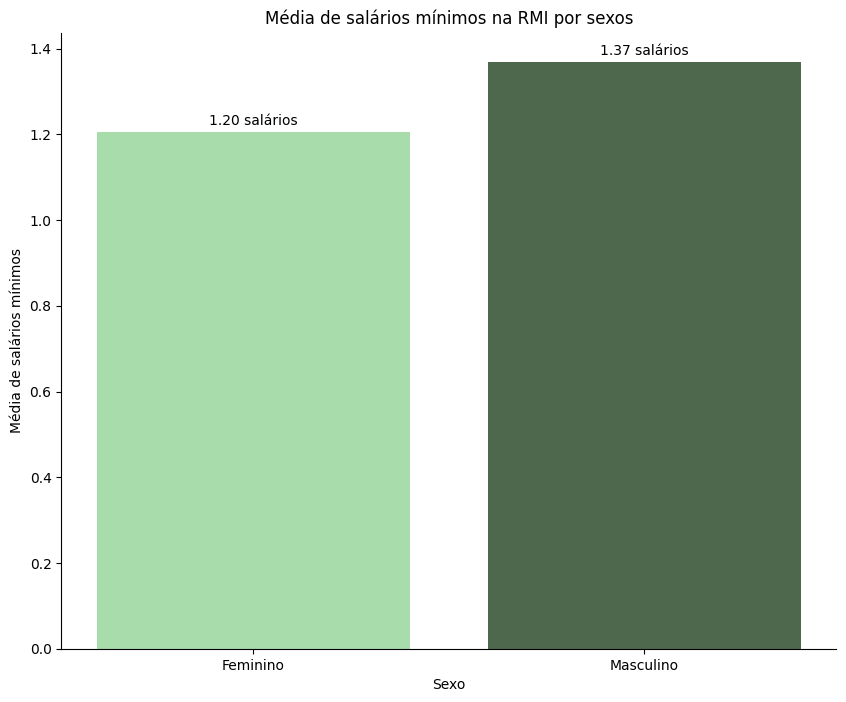

In [33]:
#pega a linha onde sexo = feminino e depois pega a quant de salarios dessas linhas
media_fem = auxilios.loc[auxilios['Sexo'] == 'Feminino', 'Quant salarios minimos na RMI'].mean()
media_masc = auxilios.loc[auxilios['Sexo'] == 'Masculino', 'Quant salarios minimos na RMI'].mean()

diferenca = abs(media_fem - media_masc)

fig, ax = plt.subplots(figsize=(10, 8))

barras = ax.bar(['Feminino', 'Masculino'],
    [media_fem, media_masc],
    color=['#A8DCAB', '#4E684E']
)

ax.set_title('Média de salários mínimos na RMI por sexos')
ax.set_xlabel('Sexo')
ax.set_ylabel('Média de salários mínimos')
ax.bar_label(barras, fmt='%.2f salários', padding=3)

ax.spines['top'].set_visible(False) #borda
ax.spines['right'].set_visible(False) 

plt.show()


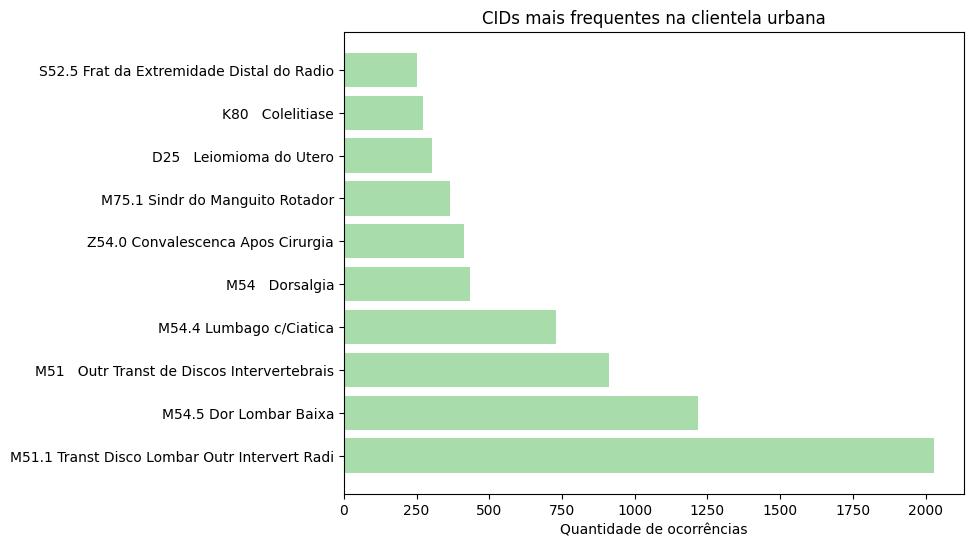

In [34]:
#filtrando e tirando os cid 'vazios'
cli_urbana = auxilios.loc[auxilios['Clientela'] == 'Rural', 'CID']
cli_urbana = cli_urbana[~cli_urbana.isin(['Zerados', 'Em Branco', '{ñ class}'])] #mantem somente os CIDs que nao estao nessa condição

contagem = cli_urbana.value_counts().head(10)
plt.figure(figsize=(8,6))
plt.barh(contagem.index,
        contagem.values,
        color='#A8DCAB'
        )
plt.title('CIDs mais frequentes na clientela rural')
plt.xlabel('Quantidade de ocorrências')

plt.show()


In [35]:
proporcao = (auxilios.groupby('UF')['Forma Filiação'] #agrupa por uf, pega a coluna forma filiação
                        .value_counts(normalize=True) #normaliza para retornar as proporções
                        .unstack(fill_value=0) #Antes retornava uma Series, que tem indice multinivel, as linhas eram combinações de UF e de Forma de Filiação, e agora é um DataFrame, com as linhas sendo os uf e as colunas as formas de filiação. E coloca 0 
                        ) 
proporcao

Forma Filiação,Autônomo,Desempregado,Doméstico,Empregado,Empresário,Equiparado a Autônomo,Facultativo,Optante Pela Lei 6.184/74,Segurado Especial,Trabalhador Avulso
UF,,,,,,,,,,
Acre,0.105061,0.203520,0.018152,0.449945,0.000000,0.000000,0.020902,0.000550,0.201870,0.000000
Alagoas,0.207575,0.242546,0.021595,0.284126,0.000000,0.000000,0.057373,0.000645,0.185012,0.001128
Amapá,0.059161,0.199885,0.013211,0.304997,0.000000,0.000000,0.018380,0.000000,0.403791,0.000574
Amazonas,0.082340,0.221946,0.013694,0.267829,0.000178,0.000000,0.021519,0.000000,0.391962,0.000534
Bahia,0.135217,0.199045,0.016023,0.226582,0.000080,0.000000,0.048839,0.000106,0.373790,0.000318
Ceará,0.148723,0.262336,0.014481,0.233821,0.000198,0.000000,0.050632,0.000099,0.289164,0.000545
Distrito Federal,0.297753,0.190698,0.032075,0.153216,0.000070,0.000000,0.120459,0.000000,0.205397,0.000332
Espírito Santo,0.228418,0.225097,0.025761,0.373254,0.000343,0.000000,0.033776,0.000000,0.110946,0.002404
Goiás,0.217196,0.216929,0.026564,0.366143,0.000000,0.000000,0.029307,0.000000,0.143125,0.000736


In [36]:
coordenadas_uf = {
    'Acre': [-9.0238, -70.812],   'Alagoas': [-9.5713, -36.782],
    'Amapá': [0.9020, -52.003],    'Amazonas': [-3.4168, -65.8561],
    'Bahia': [-12.5797, -41.7007], 'Ceará': [-5.4984, -39.3206],
    'Distrito Federal': [-15.7801, -47.9292], 'Espírito Santo': [-19.1834, -40.3089],
    'Goiás': [-15.8270, -49.8362], 'Maranhão': [-4.9609, -45.2744],
    'Mato Grosso': [-12.6819, -56.9211], 'Mato Grosso do Sul': [-20.7722, -54.7852],
    'Minas Gerais': [-18.5122, -44.555],  'Pará': [-1.9981, -54.9306],
    'Paraíba': [-7.2399, -36.782],   'Paraná': [-24.89, -51.55],
    'Pernambuco': [-8.8137, -36.9541],  'Piauí': [-6.6695, -42.28],
    'Rio de Janeiro': [-22.9099, -43.2095], 'Rio Grande do Norte': [-5.4026, -36.9541],
    'Rio Grande do Sul': [-30.0346, -51.2177], 'Rondônia': [-10.83, -63.34],
    'Roraima': [2.7376, -62.0751],   'Santa Catarina': [-27.2423, -50.2189],
    'Sergipe': [-10.5741, -37.3857], 'São Paulo': [-23.5505, -46.6333],
    'Tocantins': [-10.1753, -48.2982]
}


In [37]:
cores_filiacao = {
    'Autônomo': '#E74C3C',           # Vermelho vibrante
    'Desempregado': '#3498DB',       # Azul royal
    'Doméstico': '#1ABC9C',          # Verde turquesa
    'Empregado': '#673AB7',          # Roxo escuro 
    'Empresário': '#F39C12',         # Laranja forte
    'Equiparado a Autônomo': '#95A5A6',  # Cinza médio
    'Facultativo': '#E91E63',        # Rosa pink
    'Optante Pela Lei 6.184/74': '#9B59B6',  # Roxo 
    'Segurado Especial': '#FF9800',  # Laranja âmbar
    'Trabalhador Avulso': '#2ECC71'  # Verde esmeralda 
}

In [38]:
import io #para usar streams de dados na memória (sem precisar salvar arquivos no disco)
import base64 #para codificar dados binários (como imagens) em texto

def criar_grafico_pizza(valores, labels): #valores = proporções ----- labels = categorias
    cores = [cores_filiacao.get(label, '#CCCCCC') for label in labels]
    
    fig, ax = plt.subplots(figsize=(2, 2))
    ax.pie(valores, labels=None, startangle=90, colors=cores)
    ax.axis('equal') #circulo e nao oval
    
    buffer = io.BytesIO() #maquina virtual, não salva no disco, só na memória temporária

    plt.savefig(buffer, format='png', bbox_inches='tight', transparent=True) #bbox_inches='tight' -> remove espaços em branco ao redor do gráfico
    buffer.seek(0) #rebobina buffer para o inicio
    plt.close(fig)
    
    imagem_base64 = base64.b64encode(buffer.read()).decode() #o buffer le as dados binarios da imagem, converte em texto e transforma de byte para string
    return f'data:image/png;base64,{imagem_base64}' #retorna a string formatada e cola a strind da imagem


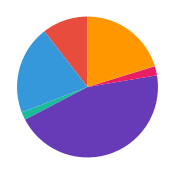
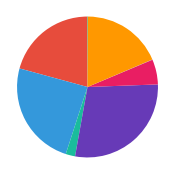
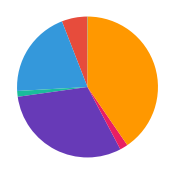
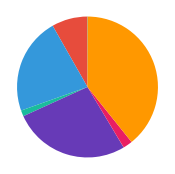
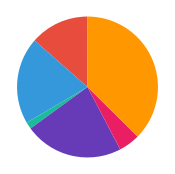
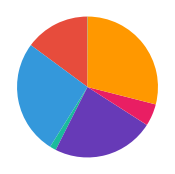
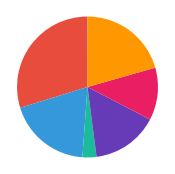
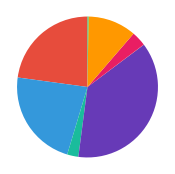
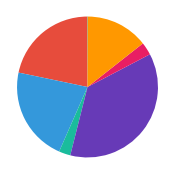
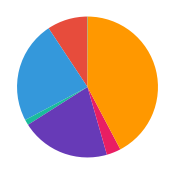
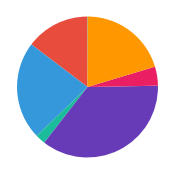
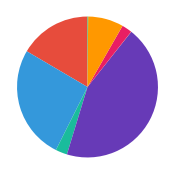
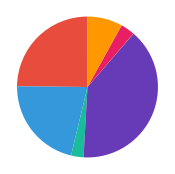
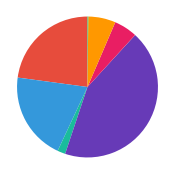
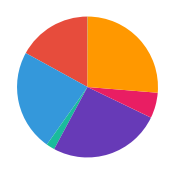
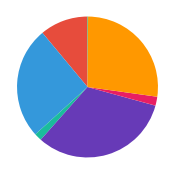
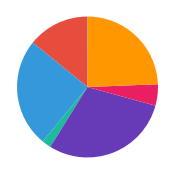
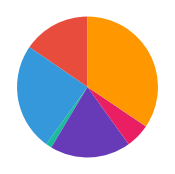
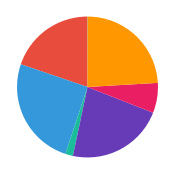
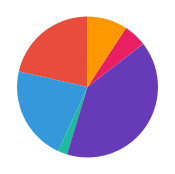
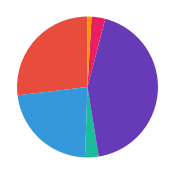
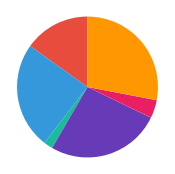
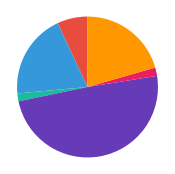
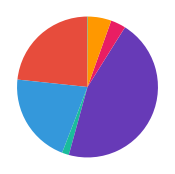
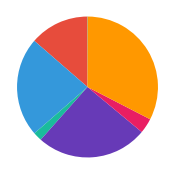
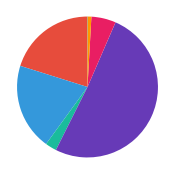
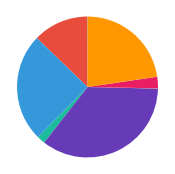

In [39]:
import folium #biblioteca de mapa interativo

mapa = folium.Map(
    location=[-15.7801, -47.9292],
    zoom_start=4,
    tiles='OpenStreetMap'
)

for uf_nome in proporcao.index: #percorre cada UF que está no índice do dataframe proporcao
    if uf_nome in coordenadas_uf:
        valores = proporcao.loc[uf_nome] #pega as proporções de cada forma de filiação naquele estado e retorna uma Serie
        valores = valores[valores > 0]
        
        if len(valores) > 0:
            #gera o gráfico
            #values = numeros/proporcoes ----- index = nomes das categotias
            imagem = criar_grafico_pizza(valores.values, valores.index)
            
            #cria tabela do popup
            tabela_html = '<table style="width:100%; font-size:11px;">'

            #legenda do popup
            for label, valor in zip(valores.index, valores.values): #label recebe o nome e valor o numero. O zip junta as duas listas, como se fosse uma tupla(pares) 
                cor = cores_filiacao.get(label, '#CCC')
                tabela_html += f'''
                <tr>
                    <!--faz o quadradinho colorido-->
                    <td><span style="background:{cor}; width:12px; height:12px;
                                     display:inline-block; border:1px solid #000;"></span></td>

                    <!--nome da categoria-->
                    <td>{label}</td>

                    <!--a porcentagem-->
                    <td style="text-align:right;"><b>{valor*100:.1f}%</b></td>
                </tr>
                '''
            tabela_html += '</table>'
            
            #conteudo do popup
            popup_html = f'''
            <!--div que vai agrupar, alinhando no centro e com tamanho minimo-->
            <div style="text-align:center; min-width:250px;">
                <!--titulo com o estado-->
                <h4 style="margin:5px 0;">{uf_nome}</h4>

                <!--grafico de pizza-->
                <img src="{imagem}" width="150" height="150">

                <!--linha horizontal para dividir-->
                <hr style="margin:10px 0;">

                <!--insere conteudo da variavel -> que é a legenda-->
                {tabela_html}
            </div>
            '''

            #adiciona um círculo no mapa
            folium.CircleMarker(
                location=coordenadas_uf[uf_nome],
                radius=5,
                color='#4E684E',
                fill=True,
                fillColor='#A8DCAB',
                fillOpacity=0.6,
                popup=folium.Popup(popup_html, max_width=250)
            ).add_to(mapa)
            
mapa

In [40]:
import seaborn as sns

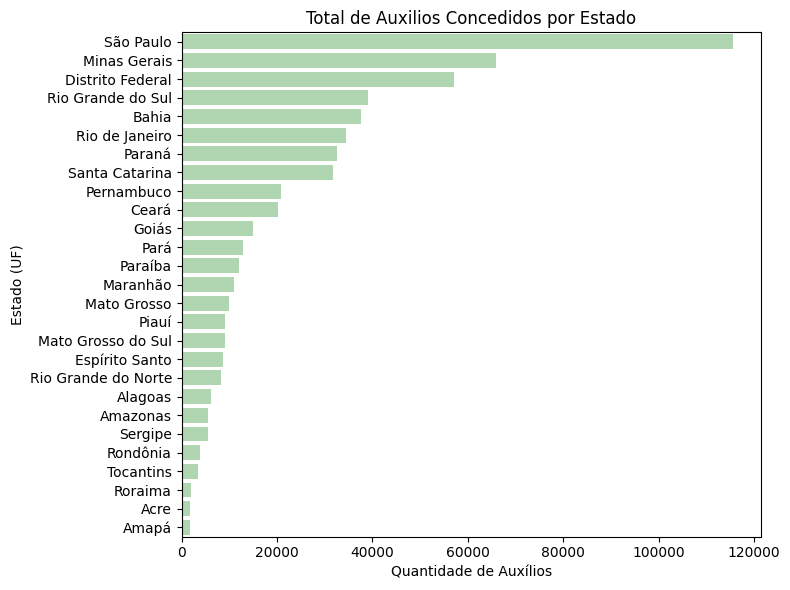

In [41]:
df_auxilios_por_UF = auxilios['UF'].value_counts().reset_index() #conta quantas vezes o estado aparece e tranforma em um DataFrame com 2 colunas(com o index e count)
df_auxilios_por_UF.columns = ['UF', 'Total de Auxilios Concedidos'] #renomeia de index-> UF e count -> Total de Auxilios Concedidos

plt.figure(figsize=(8,6))
sns.barplot(
    data=df_auxilios_por_UF,
    y='UF',
    x='Total de Auxilios Concedidos',
    color='#A8DCAB'
)
plt.title('Total de Auxilios Concedidos por Estado')
plt.xlabel('Quantidade de Auxílios')
plt.ylabel('Estado (UF)')
plt.tight_layout() #ajusta automaticamente o espaçamento
plt.show()

In [42]:
populacao = pd.read_csv('dados/dados_populacional_limpo.csv')
populacao.head()

,Unnamed: 0,Unidade da Federação,População_residente
0,0,Rondônia,1751950
1,1,Acre,884372
2,2,Amazonas,4321616
3,3,Roraima,738772
4,4,Pará,8711196


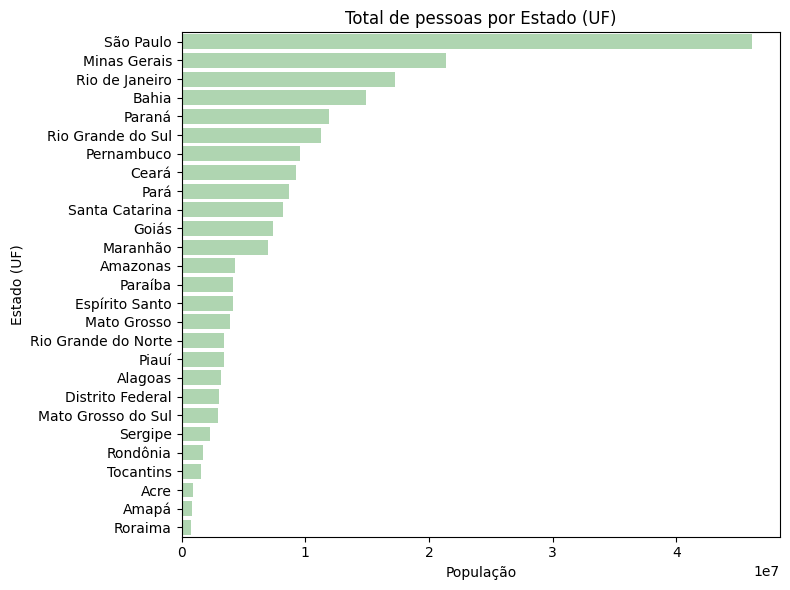

In [43]:
populacao = populacao.sort_values('População_residente', ascending=False) #ordena a população em ordem decrescente

plt.figure(figsize=(8,6))
sns.barplot(
    data=populacao,
    y='Unidade da Federação',
    x='População_residente',
    color='#A8DCAB'
)
plt.title('Total de pessoas por Estado (UF)')
plt.xlabel('População')
plt.ylabel('Estado (UF)')
plt.tight_layout() #ajusta automaticamente o espaçamento
plt.show()

In [44]:
#cria df com percentual de auxilios concedidos em comparação com a população
comparacao = pd.merge(
    df_auxilios_por_UF, #DataFrame da esquerda
    populacao, #DataFrameda direita
    left_on='UF', #coluna do df da esquerda
    right_on='Unidade da Federação' #coluna da dr da direita
)

comparacao['porcentagem_auxilio'] = (
    (comparacao['Total de Auxilios Concedidos'] / comparacao['População_residente']) * 100
).round(2) #arredonda para 2 casas decimais

comparacao = comparacao.sort_values('porcentagem_auxilio', ascending=False) #ordena as porcentagens em ordem decrescente

comparacao

,UF,Total de Auxilios Concedidos,Unnamed: 0,Unidade da Federação,População_residente,porcentagem_auxilio
2,Distrito Federal,57148,26,Distrito Federal,2996899,1.91
7,Santa Catarina,31726,21,Santa Catarina,8187029,0.39
3,Rio Grande do Sul,39089,22,Rio Grande do Sul,11233263,0.35
1,Minas Gerais,65987,16,Minas Gerais,21393441,0.31
16,Mato Grosso do Sul,9028,23,Mato Grosso do Sul,2924631,0.31
12,Paraíba,12064,11,Paraíba,4164468,0.29
6,Paraná,32615,20,Paraná,11890517,0.27
15,Piauí,9120,8,Piauí,3384547,0.27
14,Mato Grosso,9834,24,Mato Grosso,3893659,0.25
0,São Paulo,115577,19,São Paulo,46081801,0.25


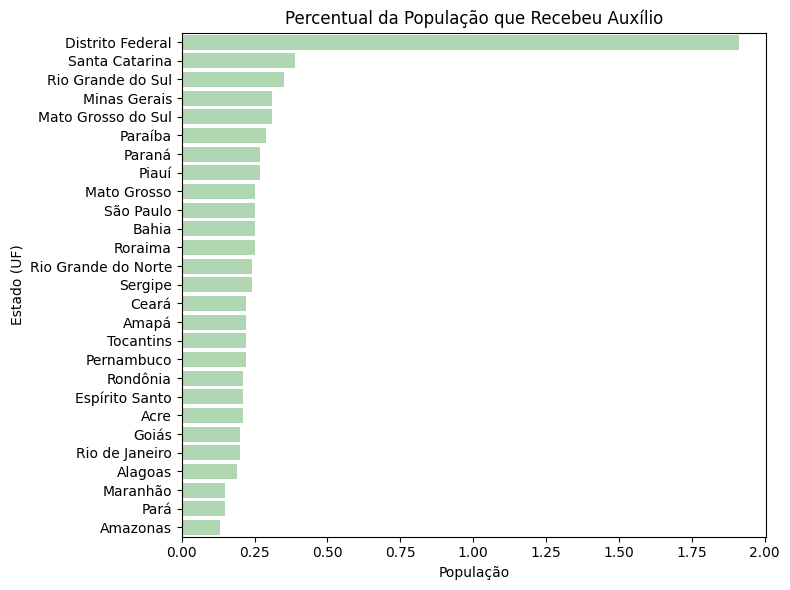

In [45]:
#Exibe o percentual de auxilios distribuidos comparado com a população
plt.figure(figsize=(8,6))
sns.barplot(
    data=comparacao,
    y='UF',
    x='porcentagem_auxilio',
    color='#A8DCAB',
)
plt.title('Percentual da População que Recebeu Auxílio')
plt.xlabel('População')
plt.ylabel('Estado (UF)')
plt.tight_layout() #ajusta automaticamente o espaçamento
plt.show()

In [46]:
#transforma as datas de string para data
auxilios['Data DIB'] = pd.to_datetime(auxilios['Data DIB'])
auxilios['Data DCB'] = pd.to_datetime(auxilios['Data DCB'])

intervalo = auxilios['Data DCB'] - auxilios['Data DIB']
media = intervalo.mean() #media
media = media.days #pega os dias

print(f"Média de duração do auxilio: {media} dias")

Média de duração do auxilio: 210 dias


In [47]:
df_mulheres = auxilios[auxilios['Sexo'] == 'Feminino']
intervalo_mulheres = df_mulheres['Data DCB'] - df_mulheres['Data DIB']
media_mulheres = intervalo_mulheres.mean() #media
media_mulheres = media_mulheres.days #pega os dias

print(f"Média de Duração do Auxilio para o Público Feminino: {media_mulheres} dia")


Média de Duração do Auxilio para o Público Feminino: 182 dia


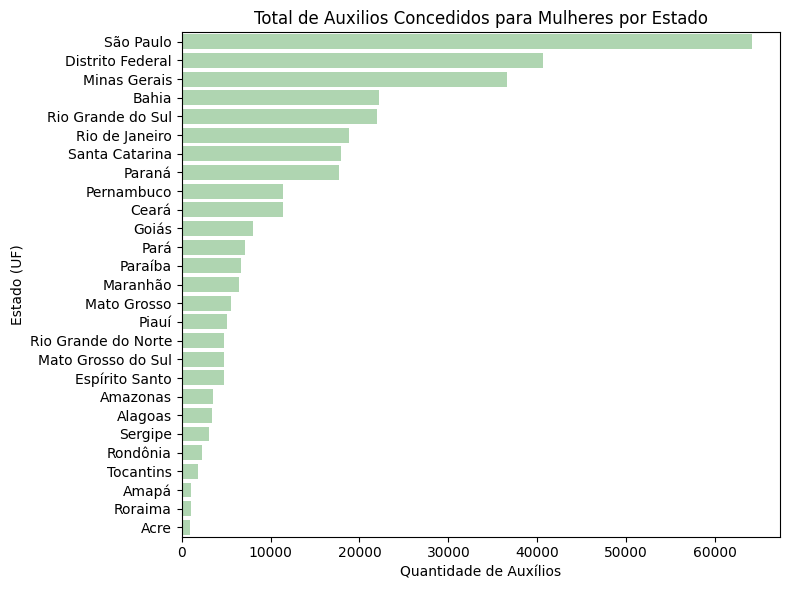

In [48]:
df_mulheres_UF = df_mulheres['UF'].value_counts().reset_index() #conta quantas vezes o estado aparece e tranforma em um DataFrame com 2 colunas(com o index e count)
df_mulheres_UF.columns = ['UF', 'Total de Auxilios Concedidos'] #renomeia de index-> UF e count -> Total de Auxilios Concedidos

plt.figure(figsize=(8,6))
sns.barplot(
    data=df_mulheres_UF,
    y='UF',
    x='Total de Auxilios Concedidos',
    color='#A8DCAB'
)
plt.title('Total de Auxilios Concedidos para Mulheres por Estado')
plt.xlabel('Quantidade de Auxílios')
plt.ylabel('Estado (UF)')
plt.tight_layout() #ajusta automaticamente o espaçamento
plt.show()

In [49]:
df_homens = auxilios[auxilios['Sexo'] == 'Masculino']
intervalo_homens = df_homens['Data DCB'] - df_homens['Data DIB']
media_homens = intervalo_homens.mean()
media_homens = media_homens.days

print(f"Média de Duração do Auxilio para o Público Masculino: {media_homens}")

Média de Duração do Auxilio para o Público Masculino: 248


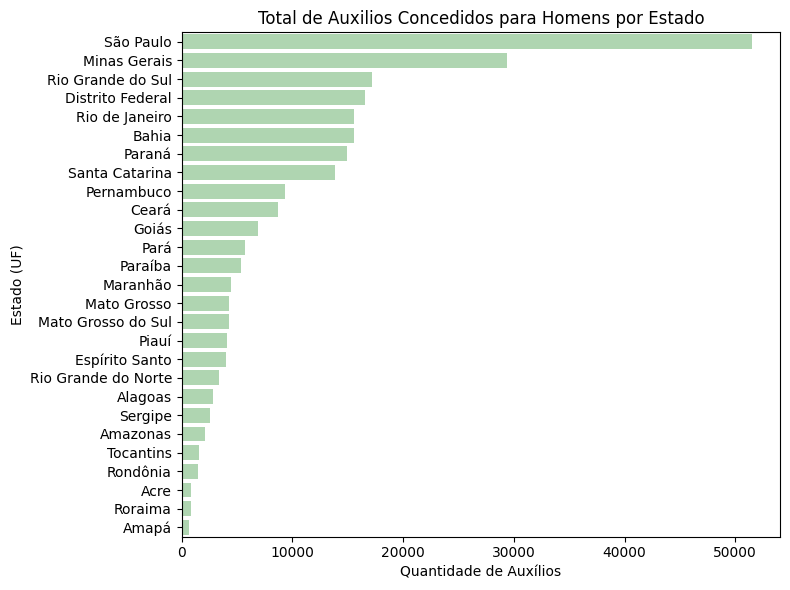

In [50]:
df_homens_UF = df_homens['UF'].value_counts().reset_index() #conta quantas vezes o estado aparece e tranforma em um DataFrame com 2 colunas(com o index e count)
df_homens_UF.columns = ['UF', 'Total de Auxilios Concedidos'] #renomeia de index-> UF e count -> Total de Auxilios Concedidos

plt.figure(figsize=(8,6))
sns.barplot(
    data=df_homens_UF,
    y='UF',
    x='Total de Auxilios Concedidos',
    color='#A8DCAB'
)
plt.title('Total de Auxilios Concedidos para Homens por Estado')
plt.xlabel('Quantidade de Auxílios')
plt.ylabel('Estado (UF)')
plt.tight_layout() #ajusta automaticamente o espaçamento
plt.show()

In [54]:
#quando salva em csv e depois le novamente, a coluna 'Duração' perde o seu tipo e vira texto
auxilios['Duração'] = pd.to_timedelta(auxilios['Duração']) #converte para timedelta

#exibe a média de dias de duração de beneficio por profissão
df_media_profissao = auxilios.groupby('Ramo Atividade')['Duração'].mean().reset_index() #agrupa por 'Ramo Atividade', pega a media de cada duração e transforma em df, removendo o indcie hierarquico
df_media_profissao['Duração'] = df_media_profissao['Duração'].dt.days
df_media_profissao = df_media_profissao.sort_values('Duração', ascending=False) #ordena a duraçãp em ordem decrescente
df_media_profissao

,Ramo Atividade,Duração
3,Industriario,4144
2,Ferroviario,3951
0,Bancario,3217
5,Maritimo,1266
8,Transportes e Carga,1257
4,Irrelevante,594
7,Servidor Publico,571
6,Rural,263
1,Comerciario,184


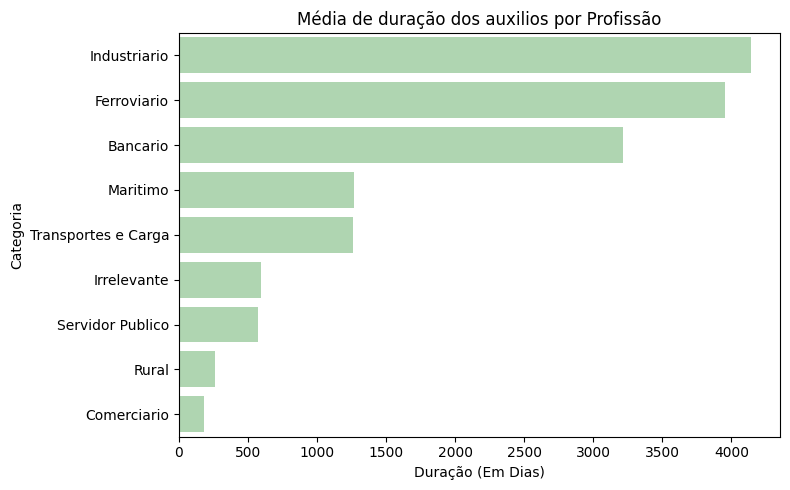

In [ ]:
plt.figure(figsize=(8,5))
sns.barplot(
    data=df_media_profissao,
    y='Ramo Atividade',
    x='Duração',
    color='#A8DCAB',
)
plt.title('Média de duração dos auxilios por Profissão')
plt.xlabel('Duração (Em Dias)')
plt.ylabel('Categoria')
plt.tight_layout()
plt.show()

In [ ]:
#exibe a média de dias de duração de beneficio por categoria
df_media_categoria = auxilios.groupby('Tipos de auxilio')['Duração'].mean().reset_index() #agrupa por 'Tipos de auxilio', pega a media de cada duração e transforma em df, removendo o indcie hierarquico
df_media_categoria['Duração'] = df_media_categoria['Duração'].dt.days
df_media_categoria = df_media_categoria.sort_values('Duração', ascending=False) #ordena a duração em ordem decrescente
df_media_categoria

,Tipos de auxilio,Duração
24,Pensão por Morte de Trabalhador Rural,12924
16,Auxílio Suplementar Acidente Trabalho,11077
23,Pensão por Morte de Ex-Combatente,4092
19,Pensão Vitalícia Dependentes Seringueiro,3204
4,Aposentadoria Especial,2692
9,Auxílio Acidente,2278
10,Auxílio Acidente Previdenciário,1583
14,Auxílio Reclusão,1080
2,Aposent. Invalidez Acidente Trabalho,921
18,Pensao Especial Hanseniase Lei 11520/07,873


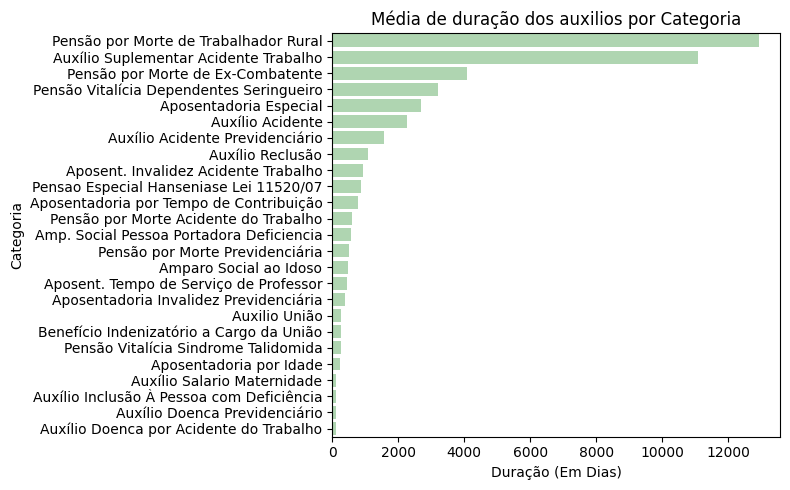

In [ ]:
plt.figure(figsize=(8,5))
sns.barplot(
    data=df_media_categoria,
    y='Tipos de auxilio',
    x='Duração',
    color='#A8DCAB',
)
plt.title('Média de duração dos auxilios por Categoria')
plt.xlabel('Duração (Em Dias)')
plt.ylabel('Categoria')
plt.tight_layout()
plt.show()

In [ ]:
#contar ocorrências de cada combinação CID + Ramo
cid_ramo = auxilios.groupby(['Ramo Atividade', 'CID']).size().reset_index(name='Quantidade') #agrupa por ramo e cid, conta quantos tem iguais e transforma o resultado em df e nomeia essa coluna de quantidade

print(cid_ramo.head(20))

   Ramo Atividade                                            CID  Quantidade
0        Bancario                                        Zerados           8
1     Comerciario        016  Tuberculose Aparelho Geniturinario           1
2     Comerciario                                     020  Peste           1
3     Comerciario            047  Meningite Devida a Enterovirus           1
4     Comerciario   179  Neopl Malig do Utero Porcao nao Especif           1
5     Comerciario  751  Out Anomalias Congenitas Aparelho Digest           1
6     Comerciario                      A01.2 Febre Paratifoide B           1
7     Comerciario           A04   Outr Infecc Intestinais Bacter           1
8     Comerciario   A04.7 Enterocolite Dev Clostridium Difficile           5
9     Comerciario              A04.9 Infecc Intestinal Bacter Ne           1
10    Comerciario                    A08.3 Outr Enterites Virais           1
11    Comerciario            A08.5 Outr Infecc Intestinais Espec           2

In [ ]:
#Pergunta: Qual a idade média de concessão por tipo de auxílio?
#Pergunta: Beneficiários com dependentes recebem valores diferentes?
#Pergunta: O grau de instrução influencia o valor e a duração do benefício?